In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
car=pd.read_csv('quikr_car.csv')
car.head()#Displays the first five rows of the DataFrame car...car.head(10) to display the first ten rows

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [2]:
car.shape


(892, 6)

In [3]:
car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [4]:

car['fuel_type'].unique()


array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [5]:
##Quality
# -year has many non-year
# -price has ask for price
# - year obj. to int
# -kms_driven has kms with integers
# kms_driven object to int
# - kms_driven as nan values

# fule_type has nan values
# -keeps first 3 words of name


In [6]:
backup=car.copy()
car=backup

In [7]:
car=car[car['year'].str.isnumeric() ]#in this we are dealing with the the values given is numerics or not
# car.info()

In [8]:
# car['year']=pd.to_numeric(car['year'],downcast = 'integer')#apply(pd.to_numeric)
car['year']=car['year'].astype(int)#in this we are converting the object type to int type
# car.dtypes
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


C:\Users\KIIT\AppData\Local\Temp\ipykernel_23264\2049363205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['year']=car['year'].astype(int)#in this we are converting the object type to int type


In [9]:
# car['year'] = car['year'].replace('...', np.nan)

In [10]:
car=car[car['Price']!="Ask For Price"]

In [11]:
car['Price']=car['Price'].str.replace(',','').astype(int)
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [12]:
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [13]:
car=car[car['kms_driven'].str.isnumeric()]
car['kms_driven']=car['kms_driven'].astype(int)
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [14]:
car=car[~car['fuel_type'].isna()]#na is used to check anyy null value is presnet or not
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [15]:
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [16]:
car=car.reset_index(drop=True)
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [17]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [18]:
car=car[car['Price']<6e6].reset_index(drop=True)

In [19]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [20]:
car.to_csv('Cleaned car.csv')

In [21]:
x=car.drop(columns='Price')
y=car['Price']

In [22]:
x

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


In [23]:
y
#include<55>

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
810    270000
811    110000
812    300000
813    260000
814    390000
Name: Price, Length: 815, dtype: int32

In [24]:
from sklearn.model_selection import  train_test_split
X_train, X_test,y_train, y_test=train_test_split(x,y,test_size=0.05) 

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [26]:
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [27]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [28]:
lr=LinearRegression()

In [29]:
pipe=make_pipeline(column_trans,lr)

In [30]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [31]:
pipe.predict(X_test)

array([ 170386.02026685,   80168.12638861,   75367.05244848,
        154306.5131019 ,  609491.9037376 ,  362158.34151471,
        391376.28457026,  777765.87558535,  181408.80612784,
        604739.98346001,  189820.36913732,  520296.60884813,
        379907.45900315,  513255.63707865,  468141.00671336,
        395962.29087135,  318254.06164842,  694815.69750139,
        337523.875212  ,  428238.72049754,  273707.88784781,
        438995.18908271,  552525.62395348,  468524.53754609,
        -40423.13966077,   88890.01212787,  431964.03628464,
        279322.05352642,  227772.4101859 ,  270743.83609086,
        146660.12846544,  590465.35415434,  378055.19135239,
        -26927.33789796,  509719.2037537 ,  333810.77463311,
       1674612.92090012,  159742.95707434,  422151.96249635,
       1015097.29764147,  406313.04924925])

In [32]:
y_pred=pipe.predict(X_test)

In [33]:
y_pred


array([ 170386.02026685,   80168.12638861,   75367.05244848,
        154306.5131019 ,  609491.9037376 ,  362158.34151471,
        391376.28457026,  777765.87558535,  181408.80612784,
        604739.98346001,  189820.36913732,  520296.60884813,
        379907.45900315,  513255.63707865,  468141.00671336,
        395962.29087135,  318254.06164842,  694815.69750139,
        337523.875212  ,  428238.72049754,  273707.88784781,
        438995.18908271,  552525.62395348,  468524.53754609,
        -40423.13966077,   88890.01212787,  431964.03628464,
        279322.05352642,  227772.4101859 ,  270743.83609086,
        146660.12846544,  590465.35415434,  378055.19135239,
        -26927.33789796,  509719.2037537 ,  333810.77463311,
       1674612.92090012,  159742.95707434,  422151.96249635,
       1015097.29764147,  406313.04924925])

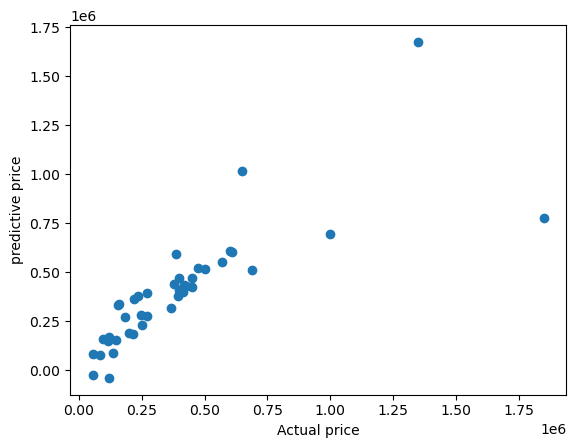

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual price")
plt.ylabel("predictive price")
plt.show()

In [43]:
r2_score(y_test,y_pred)

0.9037211308330327

In [44]:
score=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    score.append(r2_score(y_test,y_pred))

In [45]:
np.argmax(score)

655

In [38]:
score[np.argmax(score)]

0.9037211308330327

In [39]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=np.argmax(score))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test) 
r2_score(y_test,y_pred)

0.9037211308330327

In [40]:
import pickle

In [41]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [42]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([437164.50185815])